In [13]:
include("./src/tests.jl")

Flow_infinite_V (generic function with 1 method)

In [12]:
import Pkg; Pkg.add("Interpolations")
import Pkg; Pkg.add("StaticNumbers")
import Pkg; Pkg.add("Measurements")
import Pkg; Pkg.add("Dierckx")
import Pkg; Pkg.add("Roots")

   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


   Resolving package versions...


   Installed Roots ─ v2.0.19


    Updating `~/.julia/environments/v1.9/Project.toml`
  [f2b01f46] + Roots v2.0.19
    Updating `~/.julia/environments/v1.9/Manifest.toml`


  [f2b01f46] + Roots v2.0.19


Precompiling 

project...


  ✓ Roots


  ✓ Roots → RootsForwardDiffExt
  2 dependencies successfully precompiled in 2 seconds. 348 already precompiled.


The flow equation require a discretization. This can be  once the maximal radiu $R_{\mathrm{max}}$ and number of points in the $\varphi$ direction called $N$.

In [14]:
R_max= 2
N_phi=100
line=OriginInterval(N_phi,R_max)

Interval{100, 0, 2, 0.02, Float64}([0.01, 0.03, 0.05, 0.06999999999999999, 0.09, 0.11, 0.13, 0.15000000000000002, 0.17, 0.19  …  1.81, 1.83, 1.85, 1.87, 1.89, 1.91, 1.93, 1.95, 1.97, 1.99])

This create a lattice of size $R_{\mathrm{max}}$ with $N_{\varphi}$ points. The points are placed in the center of the cell, in this way 
the parity in the origin can be exploited. The type can be inxpected with 

In [18]:
line.x 

100-element Vector{Float64}:
 0.01
 0.03
 0.05
 0.06999999999999999
 0.09
 0.11
 0.13
 0.15000000000000002
 0.17
 0.19
 ⋮
 1.83
 1.85
 1.87
 1.89
 1.91
 1.93
 1.95
 1.97
 1.99

THe flow equation depends on the dimension $d$ and the UV scale $\Lambda$, once set one can assemble the flow equation that has a type.
For infinite volume one can do   

In [27]:
d=3
Λ=10
flow_infinite=SemiDiscrete(line,FlowEquation(d,Λ)) 

SemiDiscrete{FlowEquation{3, 10, 12.566370614359172, InfiniteVolume}, Interval{100, 0, 2, 0.02, Float64}}(Interval{100, 0, 2, 0.02, Float64}([0.01, 0.03, 0.05, 0.06999999999999999, 0.09, 0.11, 0.13, 0.15000000000000002, 0.17, 0.19  …  1.81, 1.83, 1.85, 1.87, 1.89, 1.91, 1.93, 1.95, 1.97, 1.99]), FlowEquation{3, 10, 12.566370614359172, InfiniteVolume}())

or using explicitly the type 

In [28]:
d=3
Λ=10
flow_infinite=SemiDiscrete(line,FlowEquation(d,Λ,InfiniteVolume())) 

SemiDiscrete{FlowEquation{3, 10, 12.566370614359172, InfiniteVolume}, Interval{100, 0, 2, 0.02, Float64}}(Interval{100, 0, 2, 0.02, Float64}([0.01, 0.03, 0.05, 0.06999999999999999, 0.09, 0.11, 0.13, 0.15000000000000002, 0.17, 0.19  …  1.81, 1.83, 1.85, 1.87, 1.89, 1.91, 1.93, 1.95, 1.97, 1.99]), FlowEquation{3, 10, 12.566370614359172, InfiniteVolume}())

for a finite volume of box size $L$ 

In [29]:
d=3
Λ=10
L=64
flow_finite=SemiDiscrete(line,FlowEquation(d,Λ,L)) 

SemiDiscrete{FlowEquation{3, 10, 64, FiniteVolume}, Interval{100, 0, 2, 0.02, Float64}}(Interval{100, 0, 2, 0.02, Float64}([0.01, 0.03, 0.05, 0.06999999999999999, 0.09, 0.11, 0.13, 0.15000000000000002, 0.17, 0.19  …  1.81, 1.83, 1.85, 1.87, 1.89, 1.91, 1.93, 1.95, 1.97, 1.99]), FlowEquation{3, 10, 64, FiniteVolume}())

the initial condition are set up with two coupling $-m^2$ and $\lambda$ for the potential and zero for 

In [34]:
 mass=0.8
 λ=1.0
 U=initial_condition(mass, 1.0, line)

2×100 Matrix{Float64}:
 -0.007999  -0.023973  -0.039875  …  5.64506  5.85487  6.06937  6.2886
  0.0        0.0        0.0          0.0      0.0      0.0      0.0

In [43]:
tfin=4

tspan = (0,tfin)
prob = ODEProblem(flow_finite,U,tspan,0)
sol = solve(prob,FBDF(),
save_everystep=false,save_start=false,save_end=true)

retcode: Success
Interpolation: 1st order linear
t: 1-element Vector{Float64}:
 4.0
u: 1-element Vector{Matrix{Float64}}:
 [0.0008860922449545915 0.002670609030872259 … 6.89406459653613 7.113290596536158; 0.0070386010548823584 0.007627804255814299 … 0.008378418783975598 0.008378418783975598]

In [37]:
using Plots

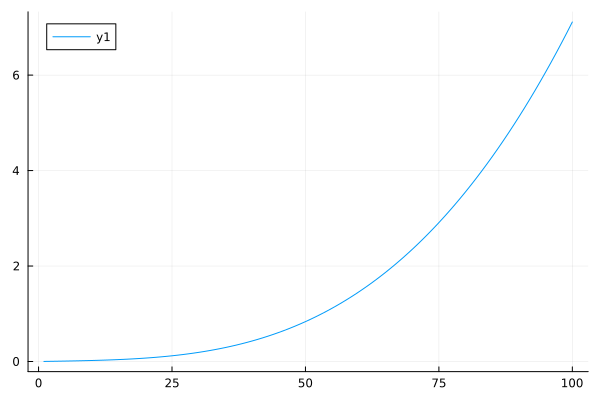

In [44]:
plot(sol[1][1,:])

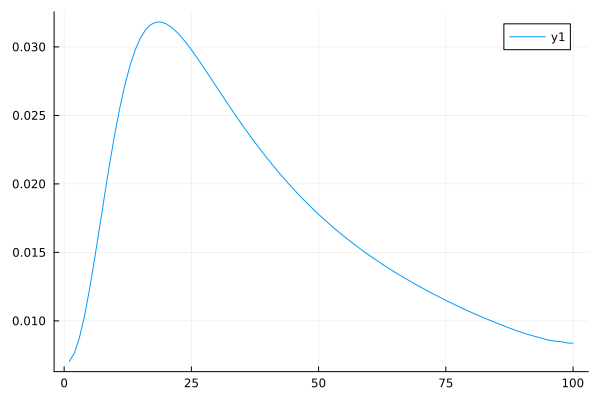

In [45]:
plot(sol[1][2,:])